In [ ]:
#####################################################################################################################
#####################################################################################################################
# Basics of Plotting Data
#####################################################################################################################
###################################################################################################################
import numpy as np
import matplotlib.pyplot as plt
import csv

# close all the figures, if open from previous commands
plt.close('all') 

########### Plot Data ###################
# first cell data
a = []

# second cell data
b = []

# open file for reading
with open('1D_time_step_0.csv') as csvDataFile:

    # read file as csv file 
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        # add cell [0] to list of dates
        a.append(row[0])

        # add cell [1] to list of scores
        b.append(row[1])

        
a = np.delete(a, 0)
b = np.delete(b, 0)

c = [float(i) for i in a]
d = [float(i) for i in b]        

#print(c)
#print(d)

plt.plot(c,d, 'o-r')  


[[3.72443e-06, 0.000507313, 0.0150488, 0.00885568, 0.256132, 1.45786, 0.489849, 0.0271705, 0.0, 3.72887e-06]]
[[3.72665e-06, 0.000519976, 0.0211097, 0.249352, 0.856997, 0.856997, 0.249352, 0.0211097, 0.000519976, 3.72665e-06]]
MIN:
-0.741934
MAX:
2.82999


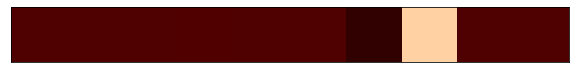

In [12]:
#####################################################################################################################
#####################################################################################################################
# Plotting 1D as an Image
#####################################################################################################################
#####################################################################################################################

from matplotlib import animation
from matplotlib import pyplot
from matplotlib import colors

import matplotlib.pyplot as plt
import numpy as np

import random
import pandas
import sys

timelapse_df = []

#injest files
for i in range(40):
    timelapse_df.append(pandas.read_csv("1D_time_step_"+str(i)+".csv"))

    
#convert from pandas dataframes to list  
timelapse = []

for i in range(len(timelapse_df)):
    timelapse.append(timelapse_df[i].values.tolist());
    
minNum = sys.maxsize
maxNum = -sys.maxsize - 1 


for i in range(len(timelapse)):
    for j in range(len(timelapse[i])):
        minNum = min(timelapse[i][j][1],minNum);
        maxNum = max(timelapse[i][j][1],maxNum);



# extract x and function values
x = []
values = []

for i in range(len(timelapse[0])):
    x.append(timelapse[0][i][0]);
    
for i in range(len(timelapse)):
    value = [];
    for j in range(len(timelapse[i])):
        value.append(timelapse[i][j][1]);
    values.append([value]);
    
print(values[1])
def update_img(n):
        tmp = values[n]
        im.set_data(tmp)
        return im
    
it0=values[0]
print(it0)
dpi = 100
fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
im = ax.imshow(it0,cmap='gist_heat',interpolation='nearest', vmin=minNum, vmax=maxNum)
im.set_clim([minNum,maxNum]) # may want to get more clever than hardcoding
fig.set_size_inches([10,10])
# tight_layout()

print("MIN:")
print(minNum)

print("MAX:")
print(maxNum)

#legend(loc=0)
ani = animation.FuncAnimation(fig,update_img,len(values),interval=len(values)*50)
writer = animation.writers['ffmpeg'](fps=15)

ani.save('1D_Advection_Image.mp4',writer=writer,dpi=dpi)
#HTML(ani.to_html5_video())

MIN:
-0.741934
MAX:
2.82999


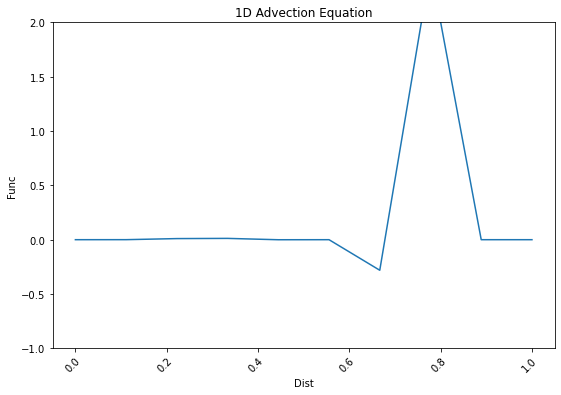

In [13]:
#####################################################################################################################
#####################################################################################################################
# Plotting 1D as a Graph
#####################################################################################################################
#####################################################################################################################

from matplotlib import animation
from matplotlib import pyplot
from matplotlib import colors

import matplotlib.pyplot as plt
import numpy as np

import random
import pandas
import sys

timelapse_df = []

#injest files
for i in range(40):
    timelapse_df.append(pandas.read_csv("1D_time_step_"+str(i)+".csv"))

#convert from pandas dataframes to list  
timelapse = []

for i in range(len(timelapse_df)):
    timelapse.append(timelapse_df[i].values.tolist());
    
minNum = sys.maxsize
maxNum = -sys.maxsize - 1 

for i in range(len(timelapse)):
    for j in range(len(timelapse[i])):
        minNum = min(timelapse[i][j][1],minNum);
        maxNum = max(timelapse[i][j][1],maxNum);

# extract x and function values
x = []
values = []

for i in range(len(timelapse[0])):
    x.append(timelapse[0][i][0]);
    
for i in range(len(timelapse)):
    value = [];
    for j in range(len(timelapse[i])):
        value.append(timelapse[i][j][1]);
    values.append([value]);
    
    
    
    
# make the damn plot    
def update_img(n):
        tmp = values[n][0]
        line.set_ydata(tmp)

        fig.gca().relim()
        fig.gca().autoscale_view()
        return line


fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot(x, values[0][0])
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
#plt.subplots_adjust(lebottom =0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
#ax.margins(y=2)
fig.set_size_inches(9, 6, True)
plt.ylabel('Func')
plt.xlabel('Dist')
plt.ylim(-1,2)
plt.title('1D Advection Equation')


#%matplotlib notebook

print("MIN:")
print(minNum)

print("MAX:")
print(maxNum)

#legend(loc=0)
ani = animation.FuncAnimation(fig,update_img,len(values),interval=500,save_count=100)
writer = animation.writers['ffmpeg'](fps=10,bitrate=3500)

dpi = 1000

ani.save('1D_Advection_Graph.mp4',writer=writer,dpi=dpi)
#HTML(ani.to_html5_video())

<Figure size 432x288 with 0 Axes>

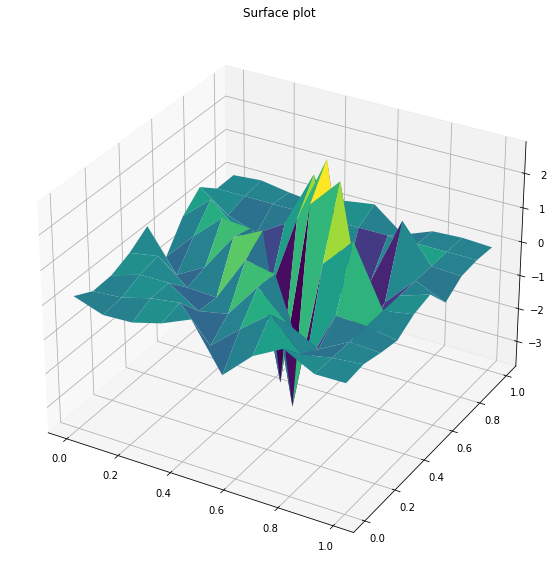

In [12]:
#####################################################################################################################
#####################################################################################################################
# Basics of Plotting Data
#####################################################################################################################
###################################################################################################################
import numpy as np
import matplotlib.pyplot as plt
import csv

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d



# close all the figures, if open from previous commands
plt.close('all') 

########### Plot Data ###################
a = []
b = []
c = []

# open file for reading
with open('2D_time_step_39.csv') as csvDataFile:

    # read file as csv file 
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        a.append(row[0])
        b.append(row[1])
        c.append(row[2])

        
a = np.delete(a, 0)
b = np.delete(b, 0)
c = np.delete(c, 0)

d = [float(i) for i in a]
e = [float(i) for i in b]        
f = [float(i) for i in c]        

d_2d = np.reshape(d, (10, 10))
e_2d = np.reshape(e, (10, 10))
f_2d = np.reshape(f, (10, 10))

fig = plt.figure()
plt.figure(figsize=(12,10))

ax = plt.axes(projection='3d')

ax.plot_surface(d_2d, e_2d, f_2d,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.savefig("test.png")

plt.show()


<ipython-input-19-2c289c117382>:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

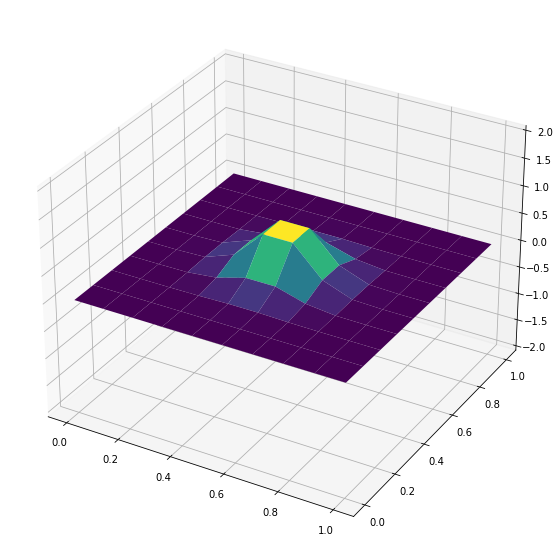

<Figure size 432x288 with 0 Axes>

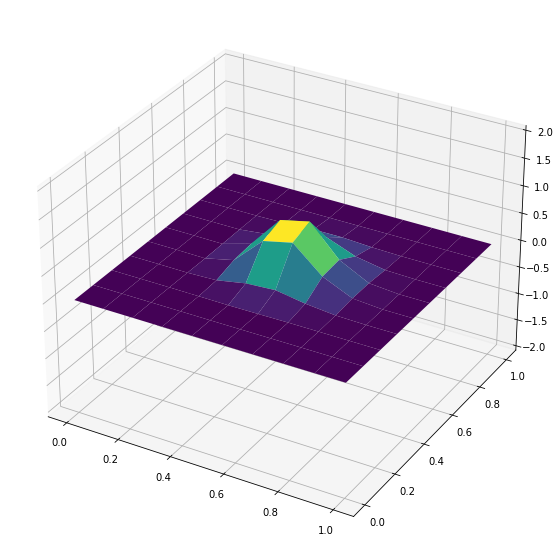

<Figure size 432x288 with 0 Axes>

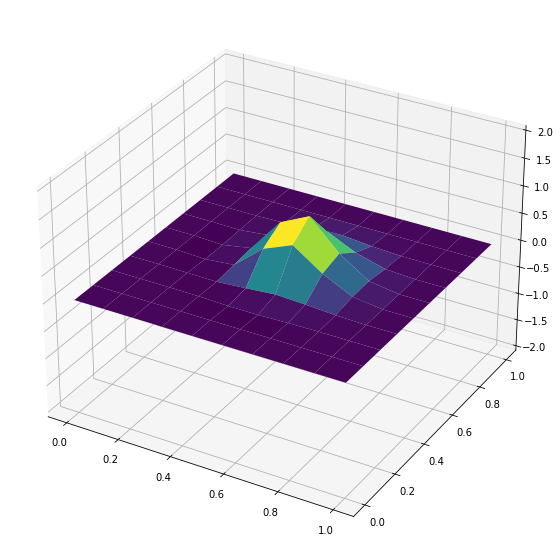

<Figure size 432x288 with 0 Axes>

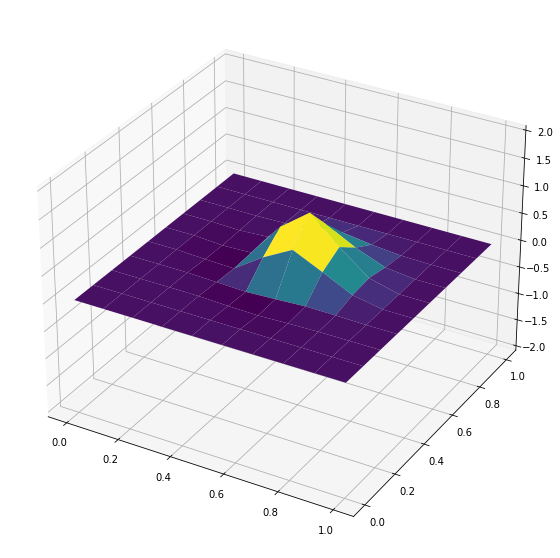

<Figure size 432x288 with 0 Axes>

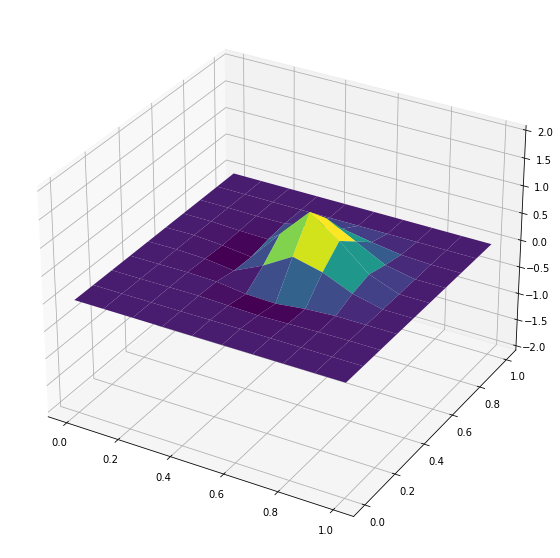

<Figure size 432x288 with 0 Axes>

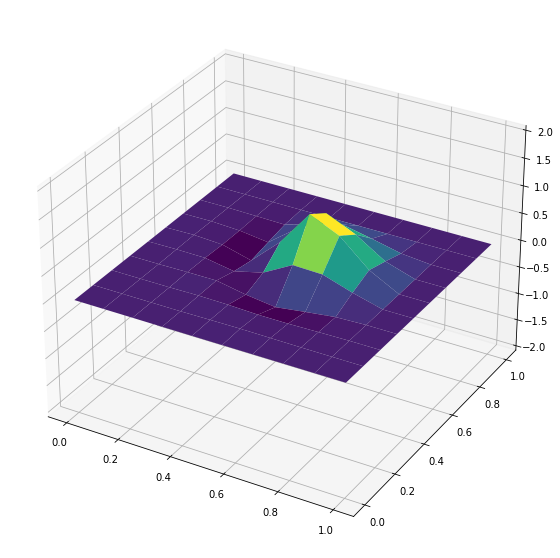

<Figure size 432x288 with 0 Axes>

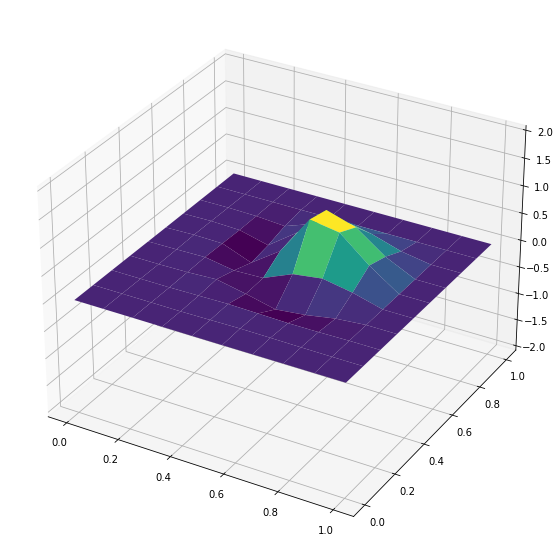

<Figure size 432x288 with 0 Axes>

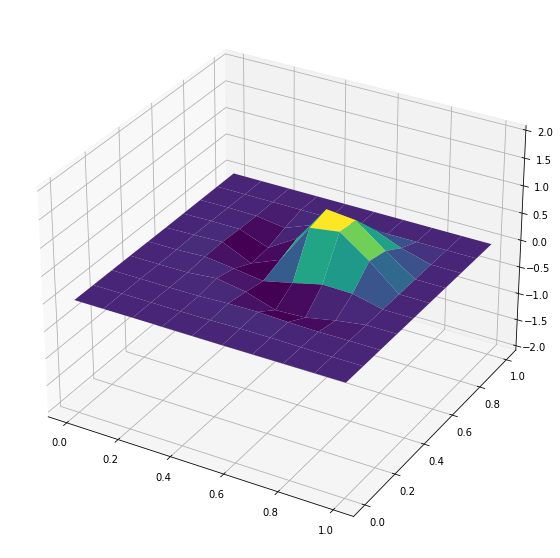

<Figure size 432x288 with 0 Axes>

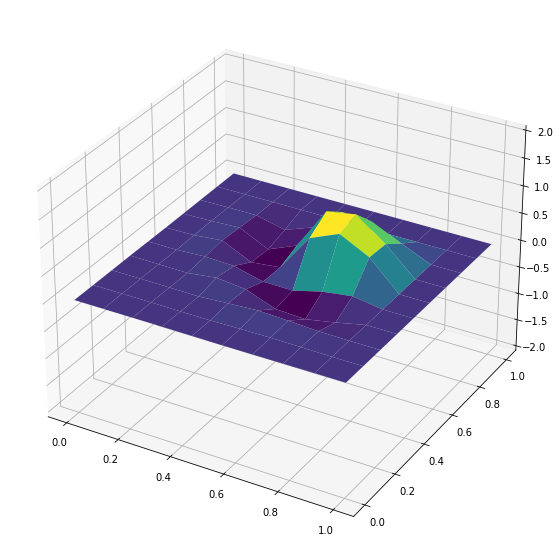

<Figure size 432x288 with 0 Axes>

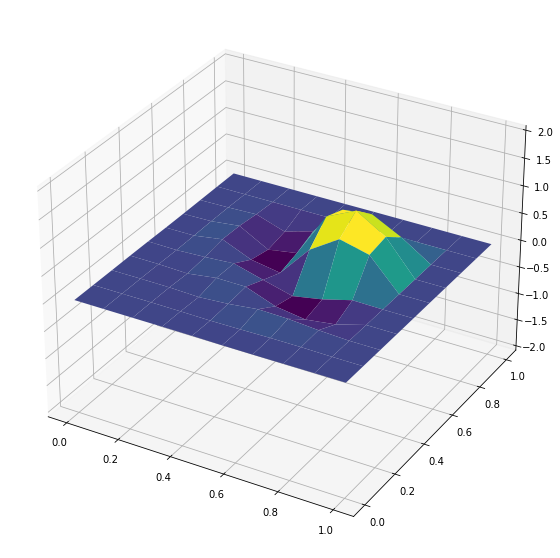

<Figure size 432x288 with 0 Axes>

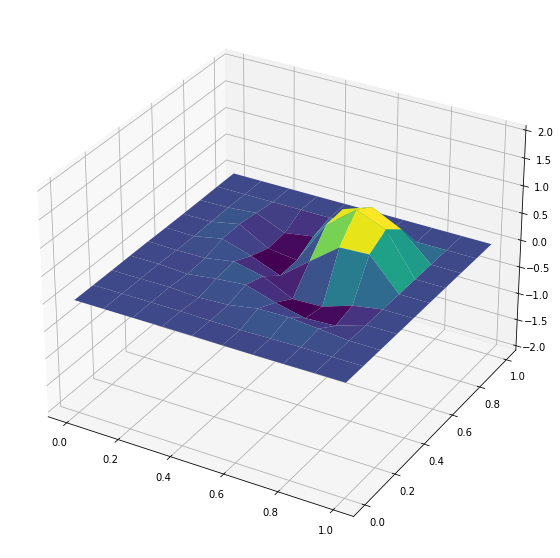

<Figure size 432x288 with 0 Axes>

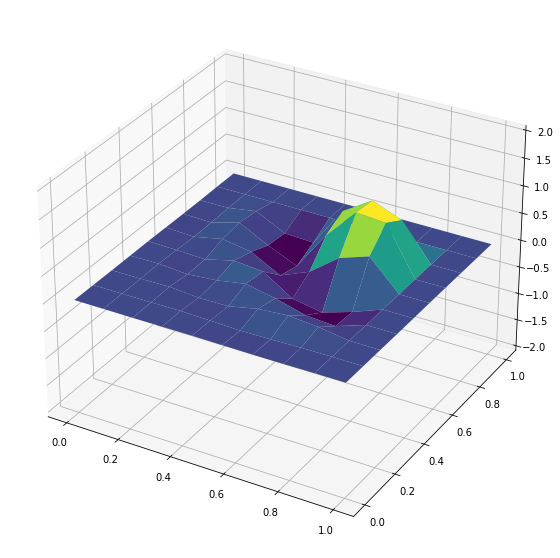

<Figure size 432x288 with 0 Axes>

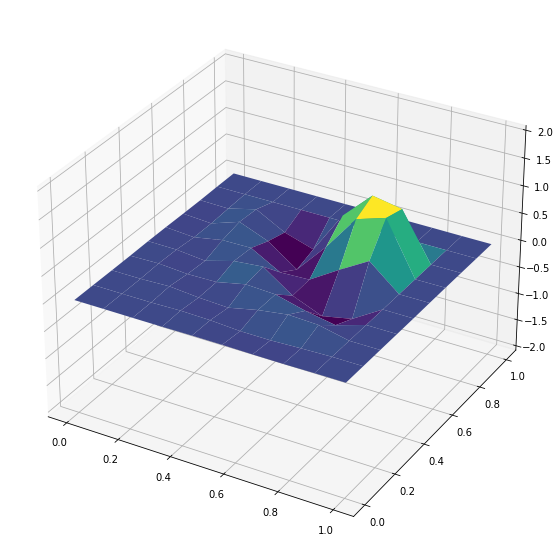

<Figure size 432x288 with 0 Axes>

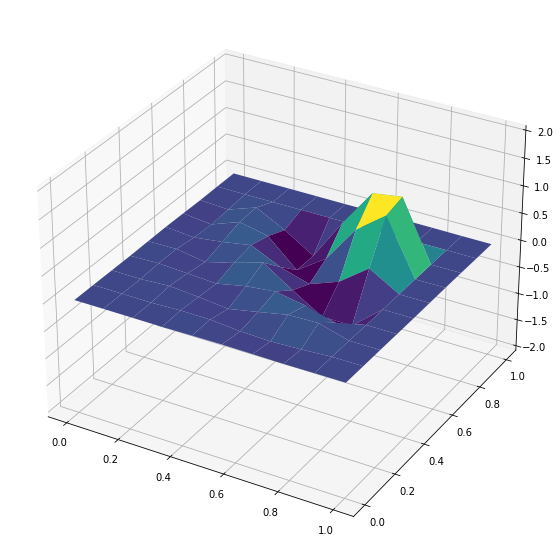

<Figure size 432x288 with 0 Axes>

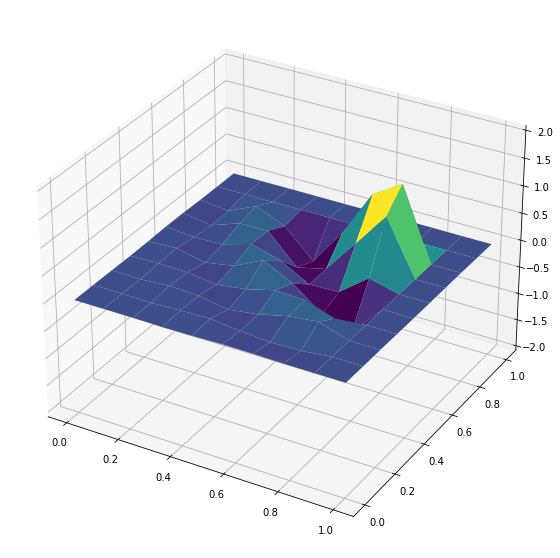

<Figure size 432x288 with 0 Axes>

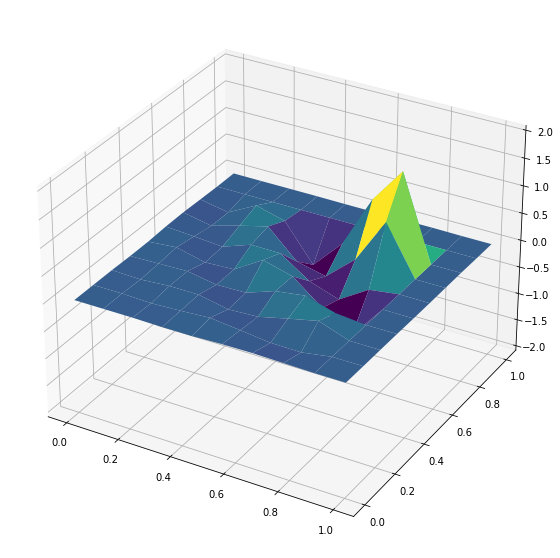

<Figure size 432x288 with 0 Axes>

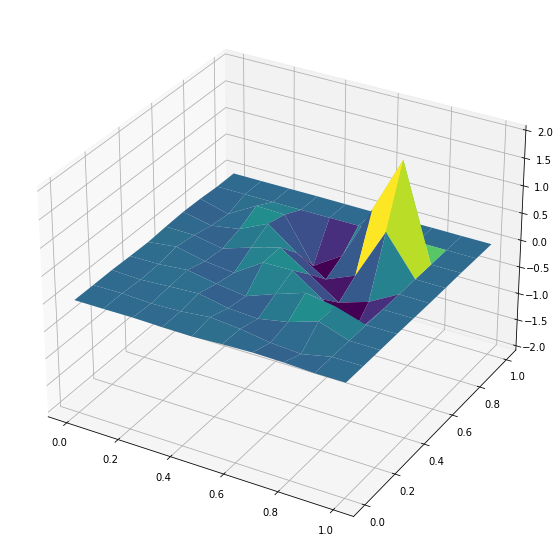

<Figure size 432x288 with 0 Axes>

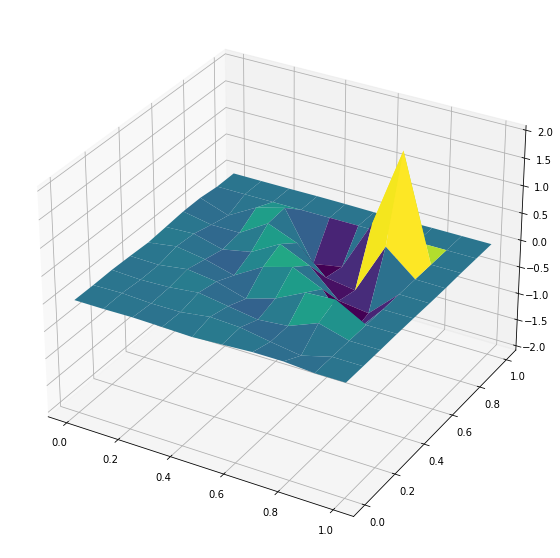

<Figure size 432x288 with 0 Axes>

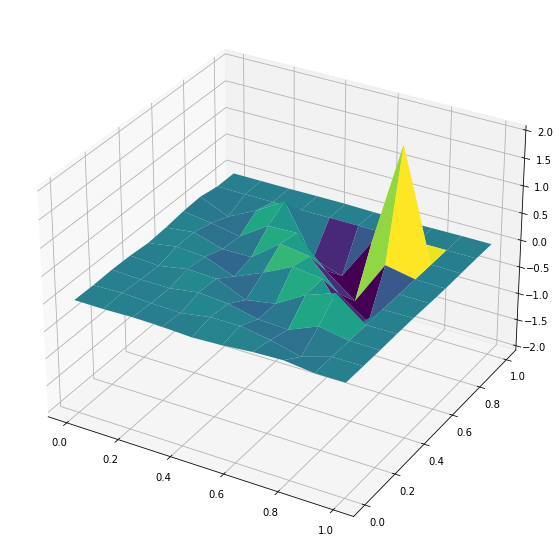

<Figure size 432x288 with 0 Axes>

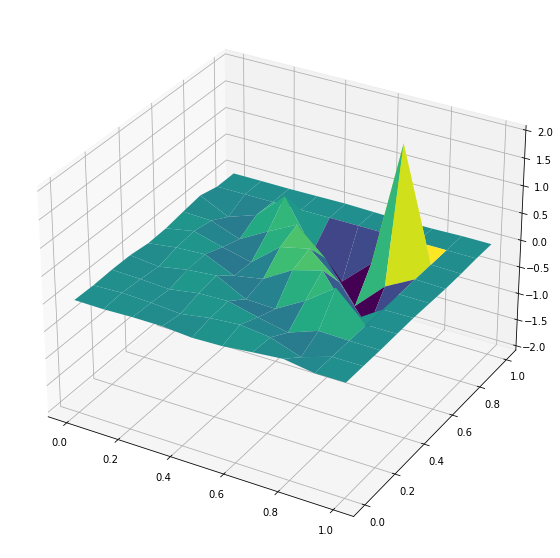

<Figure size 432x288 with 0 Axes>

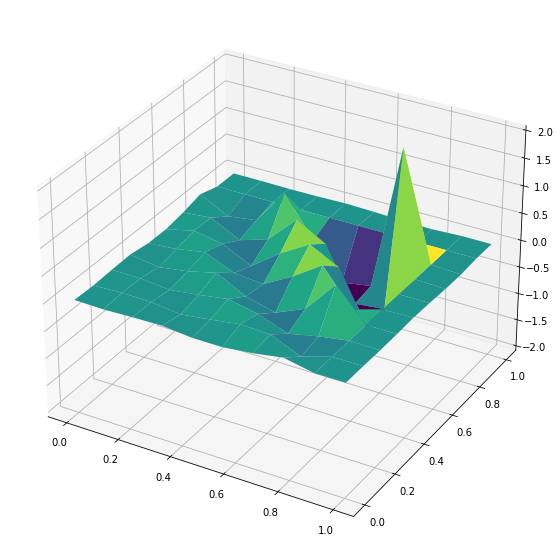

<Figure size 432x288 with 0 Axes>

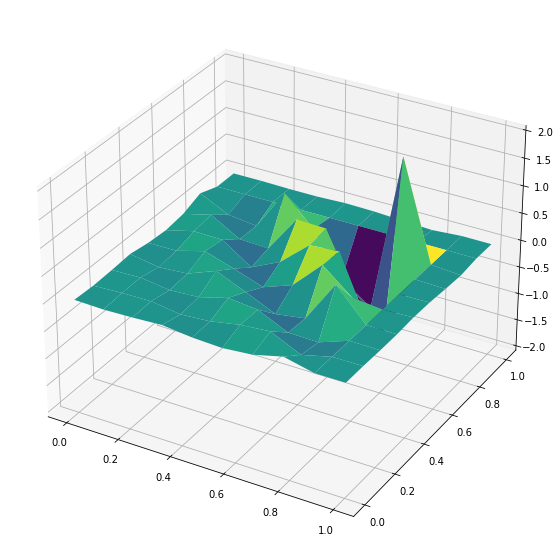

<Figure size 432x288 with 0 Axes>

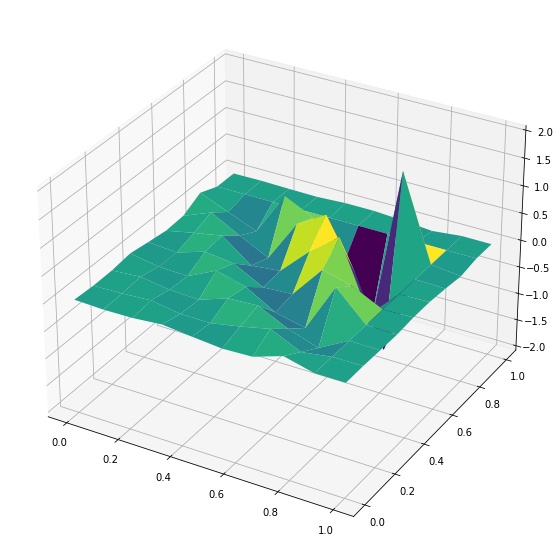

<Figure size 432x288 with 0 Axes>

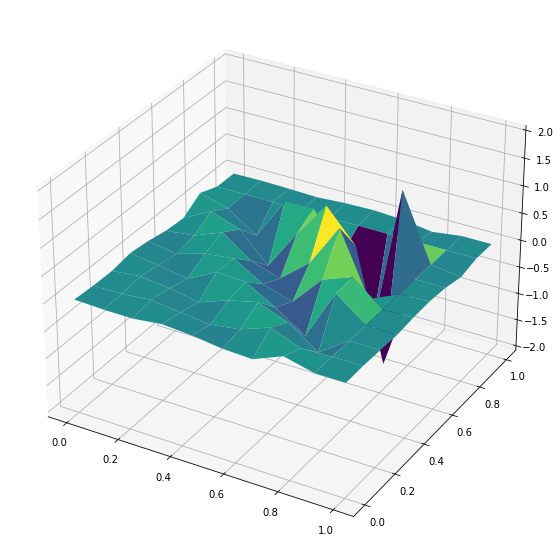

<Figure size 432x288 with 0 Axes>

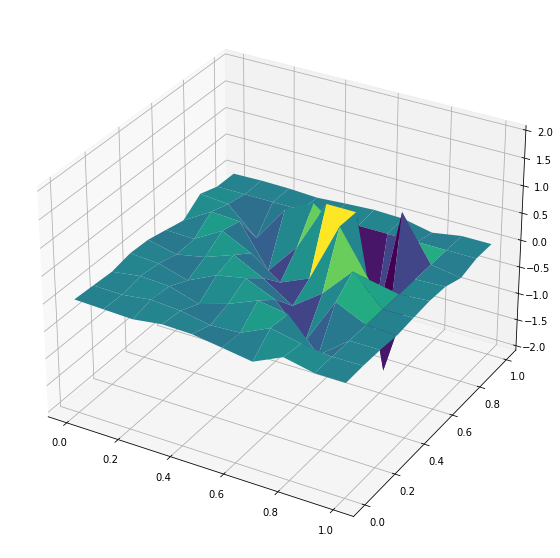

<Figure size 432x288 with 0 Axes>

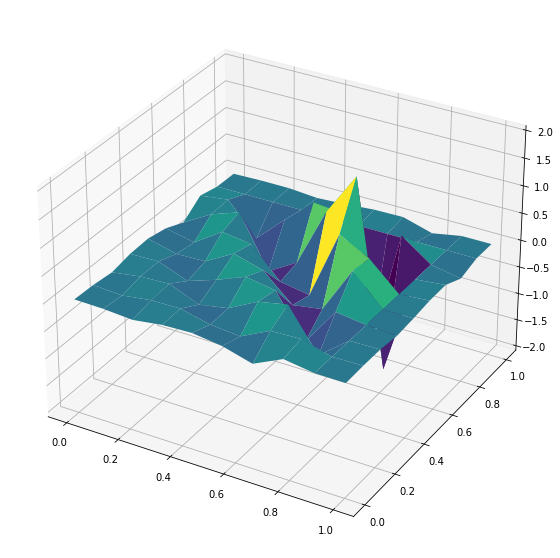

<Figure size 432x288 with 0 Axes>

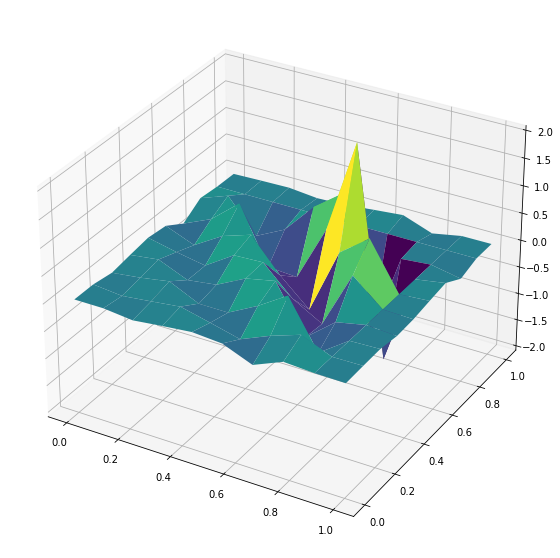

<Figure size 432x288 with 0 Axes>

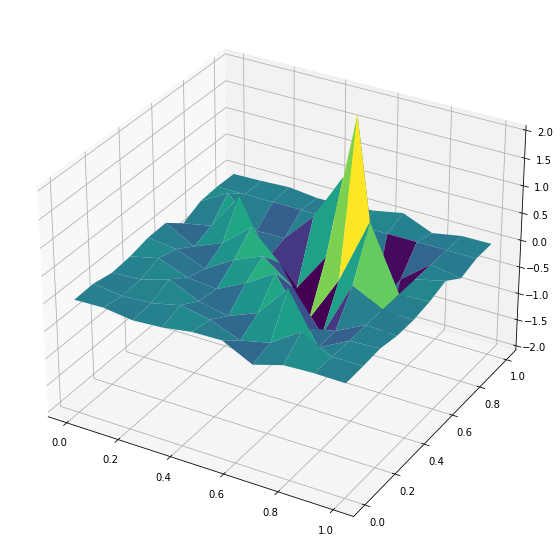

<Figure size 432x288 with 0 Axes>

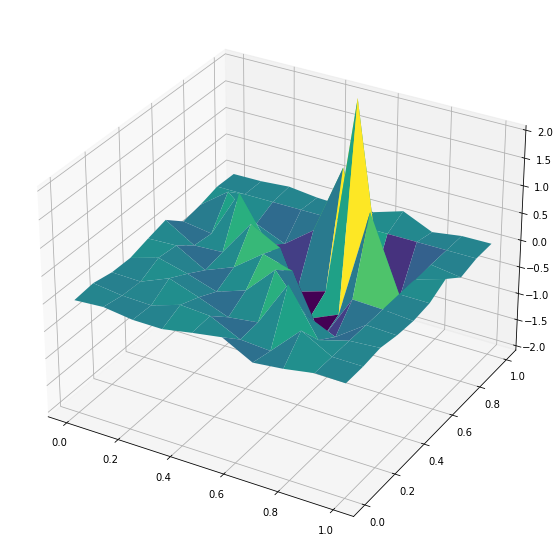

<Figure size 432x288 with 0 Axes>

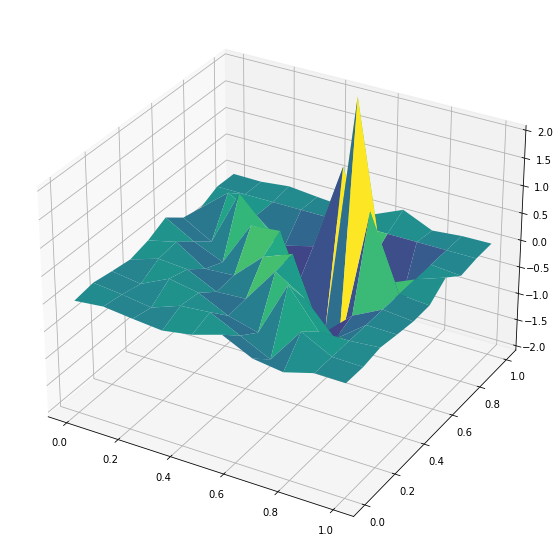

<Figure size 432x288 with 0 Axes>

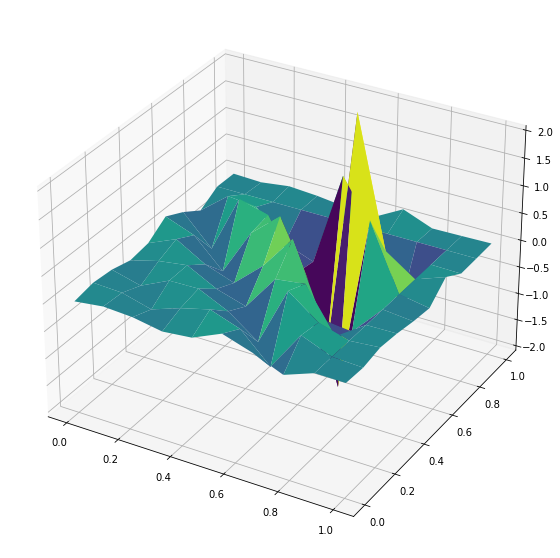

<Figure size 432x288 with 0 Axes>

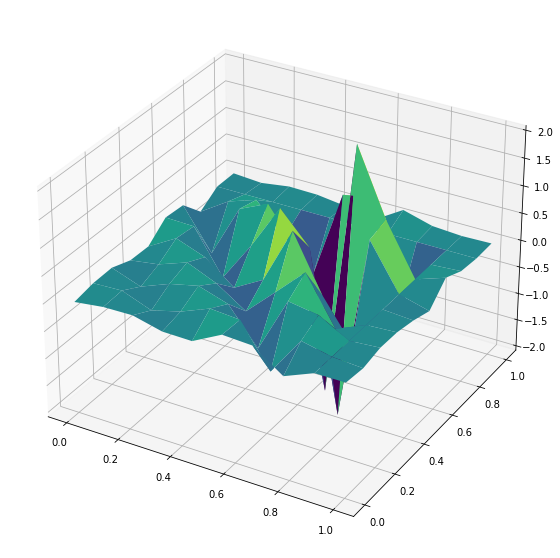

<Figure size 432x288 with 0 Axes>

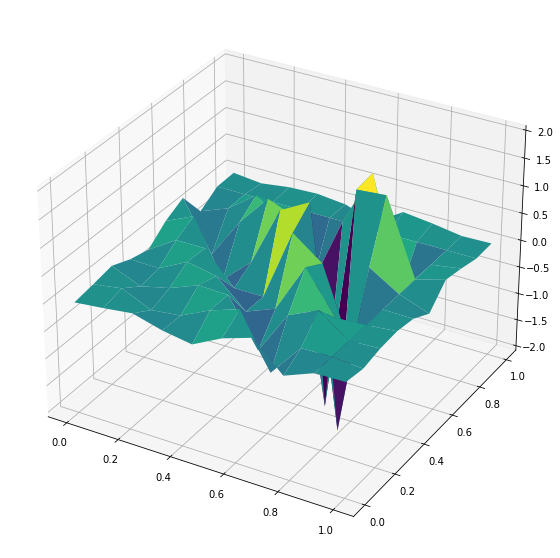

<Figure size 432x288 with 0 Axes>

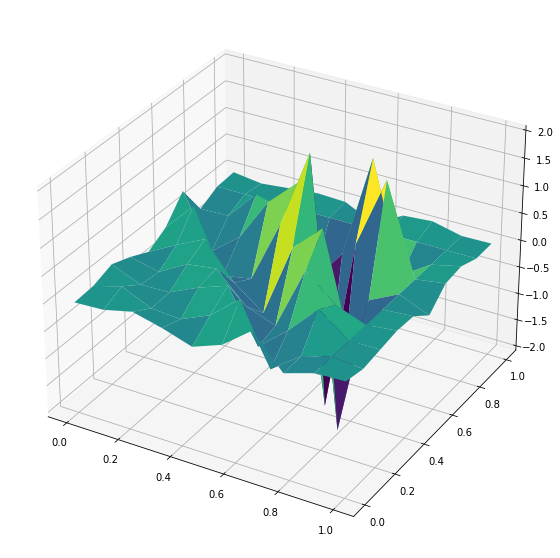

<Figure size 432x288 with 0 Axes>

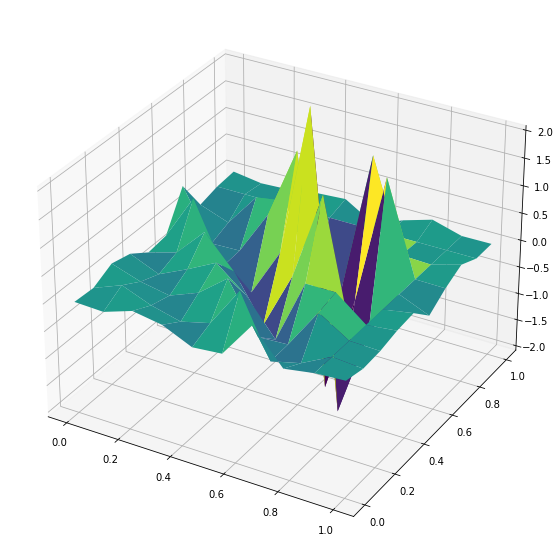

<Figure size 432x288 with 0 Axes>

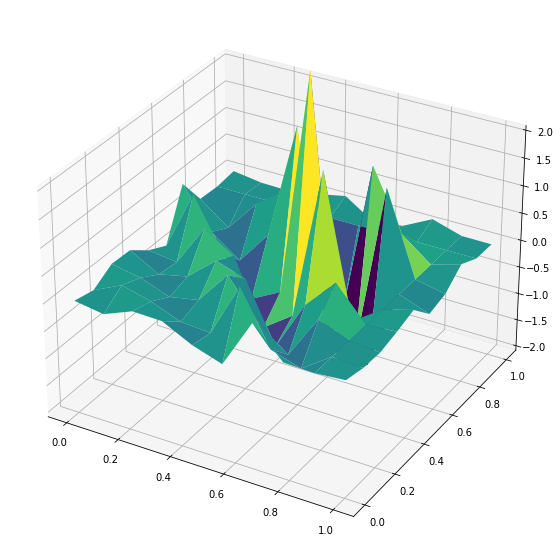

<Figure size 432x288 with 0 Axes>

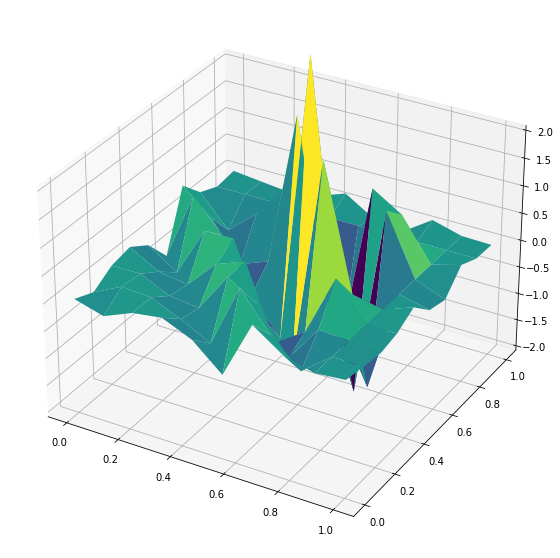

<Figure size 432x288 with 0 Axes>

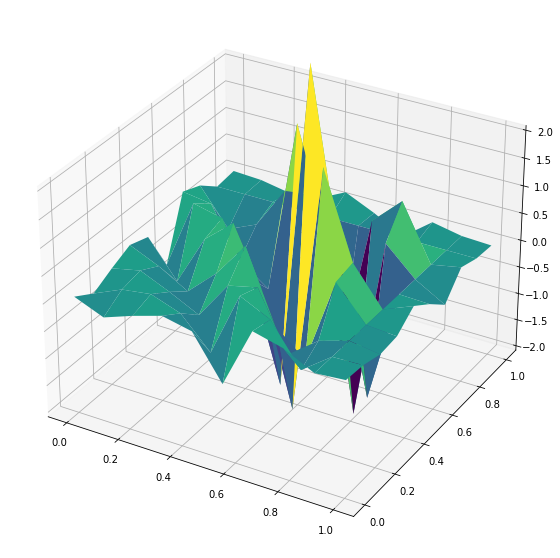

<Figure size 432x288 with 0 Axes>

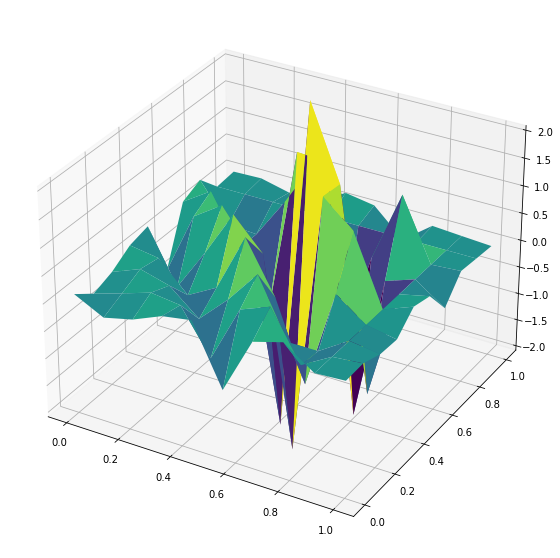

<Figure size 432x288 with 0 Axes>

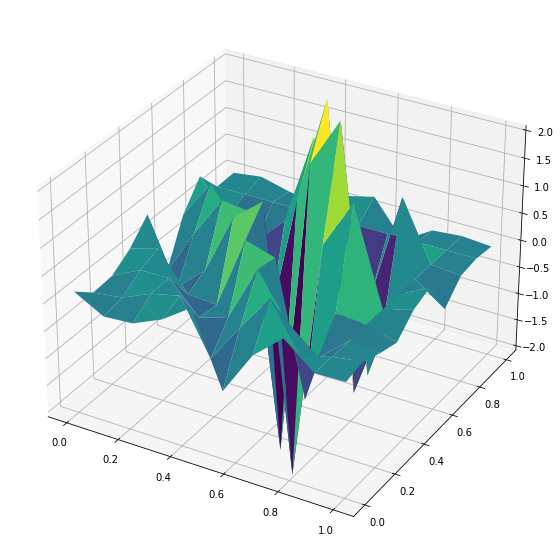

In [19]:
#####################################################################################################################
#####################################################################################################################
# Plotting 2D as Graph
#####################################################################################################################
###################################################################################################################
import numpy as np
import matplotlib.pyplot as plt
import csv

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d


# close all the figures, if open from previous commands
plt.close('all') 


for i in range(40):

    ########### Plot Data ###################
    a = []
    b = []
    c = []

    # open file for reading
    with open("2D_time_step_"+str(i)+".csv") as csvDataFile:

        # read file as csv file 
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            a.append(row[0])
            b.append(row[1])
            c.append(row[2])


    a = np.delete(a, 0)
    b = np.delete(b, 0)
    c = np.delete(c, 0)

    d = [float(i) for i in a]
    e = [float(i) for i in b]        
    f = [float(i) for i in c]        

    d_2d = np.reshape(d, (10, 10))
    e_2d = np.reshape(e, (10, 10))
    f_2d = np.reshape(f, (10, 10))

    fig = plt.figure()
    plt.figure(figsize=(12,10))

    ax = plt.axes(projection='3d')

    ax.plot_surface(d_2d, e_2d, f_2d,cmap='viridis', edgecolor='none')
    ax.set_zlim3d(-2,2)
    #ax.set_title('Surface plot')
    plt.savefig("2D_Advection_Graph"+str(i)+".png")

    
    
    
#plt.show()


<ipython-input-21-e0547e504a8c>:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-21-e0547e504a8c>:54: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(d_2d, e_2d, f_2d,cmap='viridis', edgecolor='none')


<Figure size 432x288 with 0 Axes>

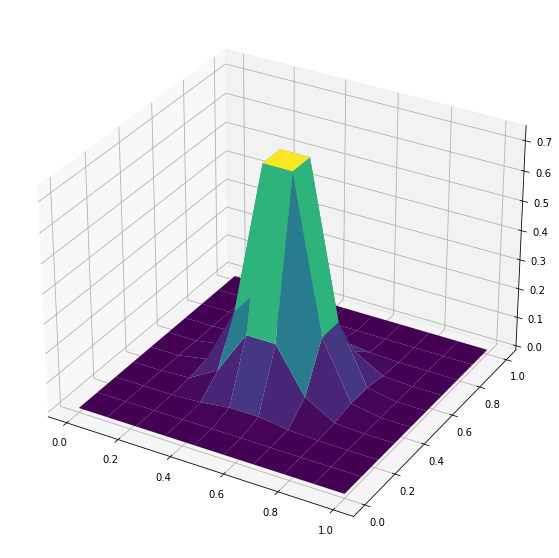

<Figure size 432x288 with 0 Axes>

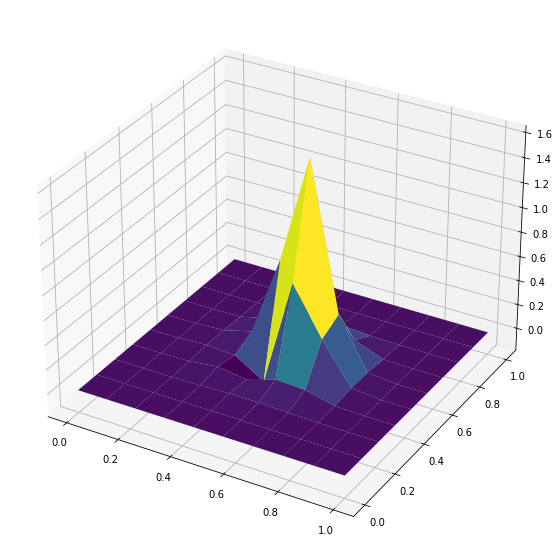

<Figure size 432x288 with 0 Axes>

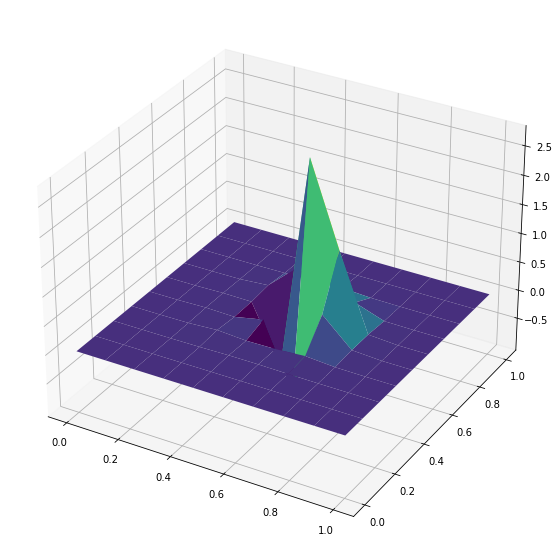

<Figure size 432x288 with 0 Axes>

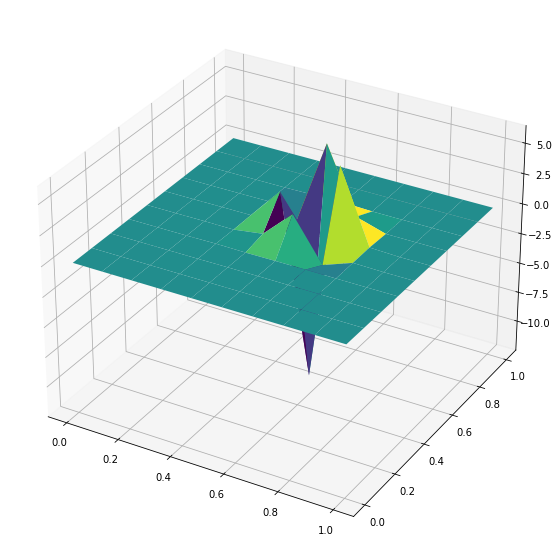

<Figure size 432x288 with 0 Axes>

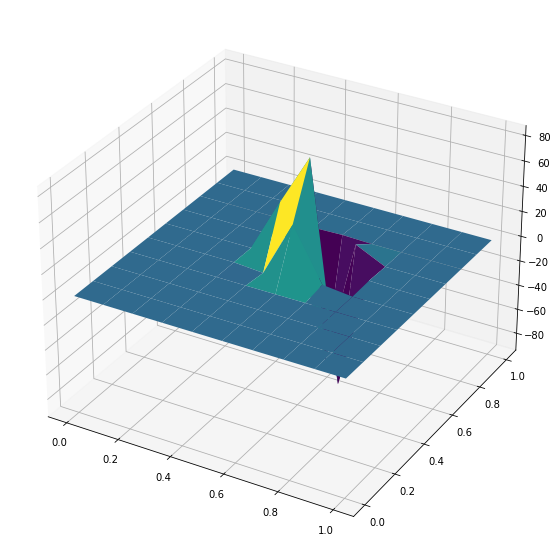

<Figure size 432x288 with 0 Axes>

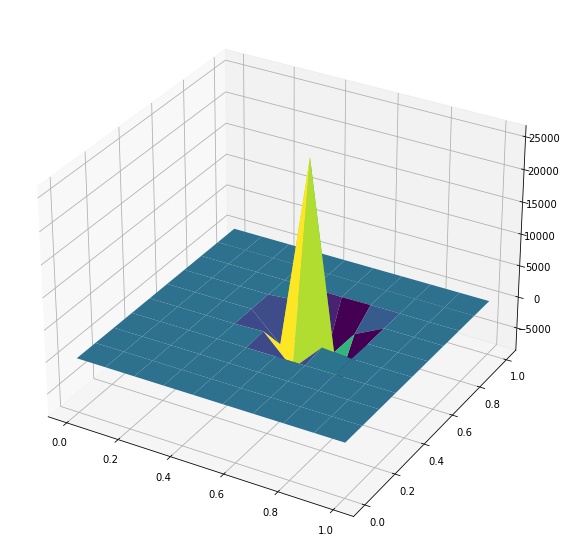

<Figure size 432x288 with 0 Axes>

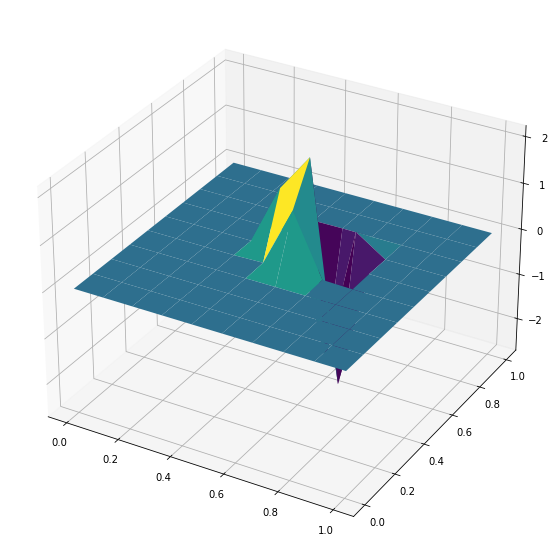

<Figure size 432x288 with 0 Axes>

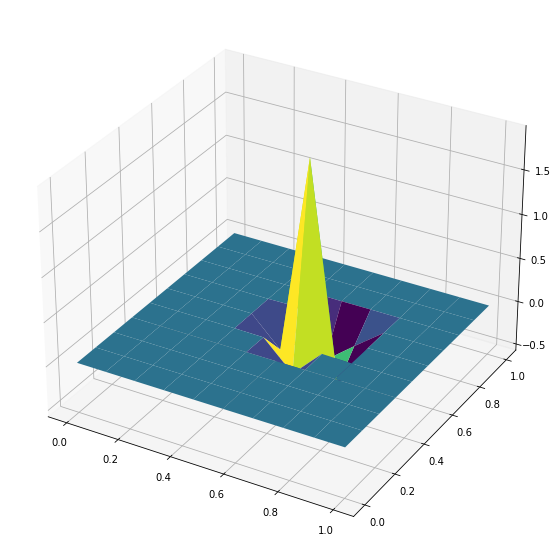

<Figure size 432x288 with 0 Axes>

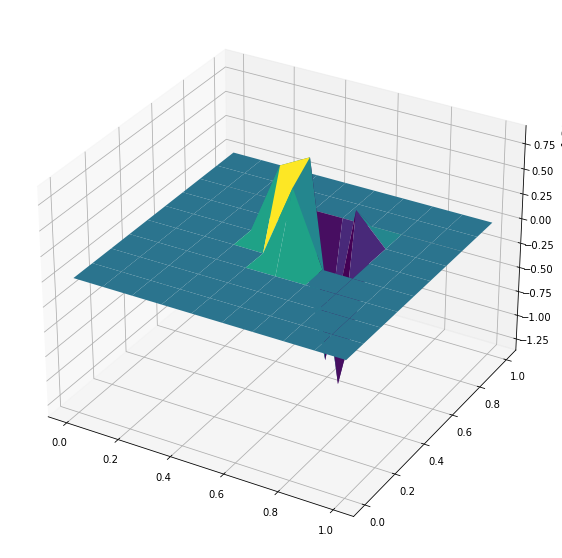

<Figure size 432x288 with 0 Axes>

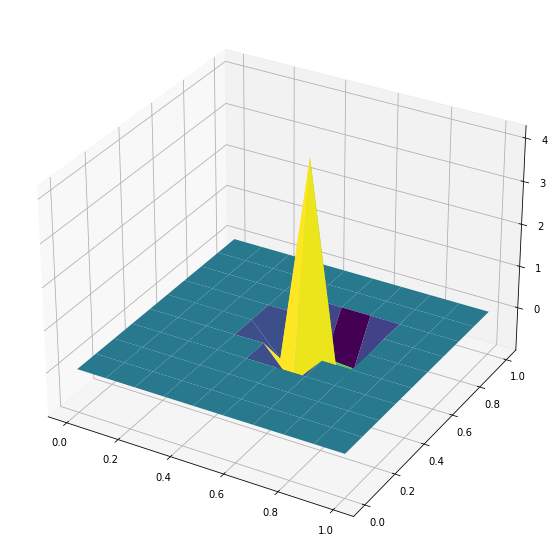

<Figure size 432x288 with 0 Axes>

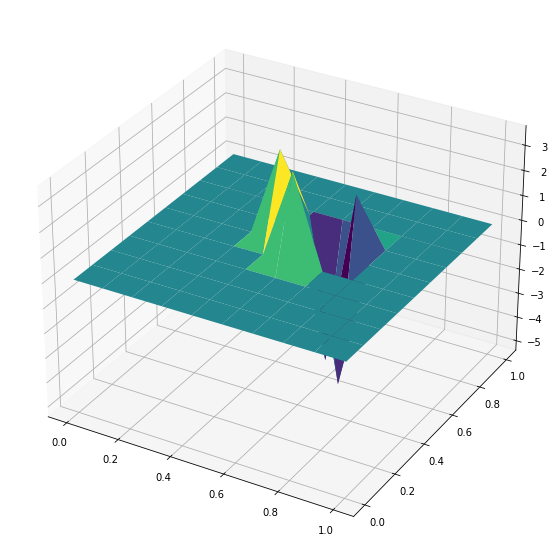

<Figure size 432x288 with 0 Axes>

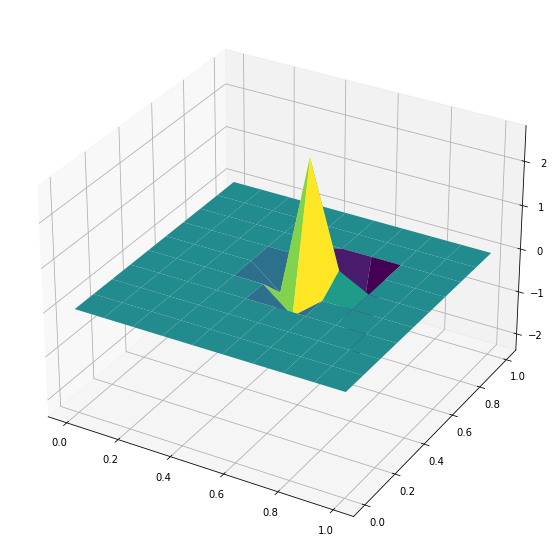

<Figure size 432x288 with 0 Axes>

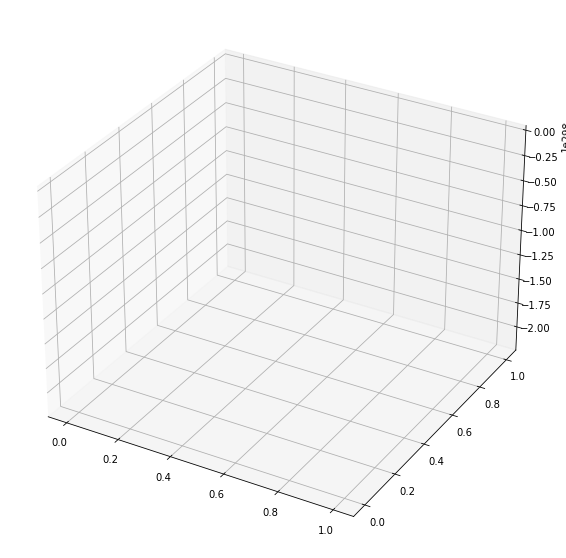

<Figure size 432x288 with 0 Axes>

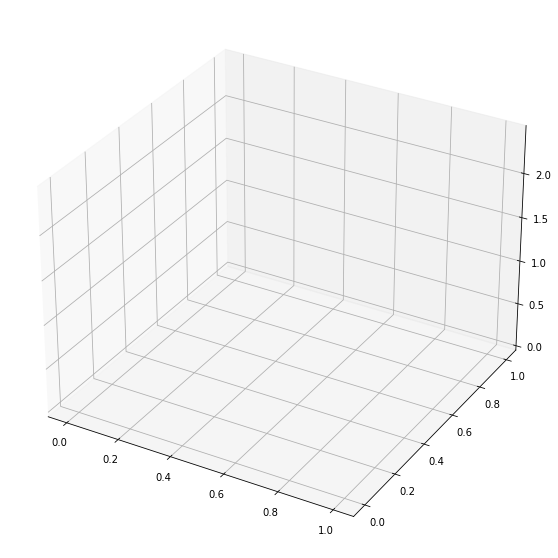

<Figure size 432x288 with 0 Axes>

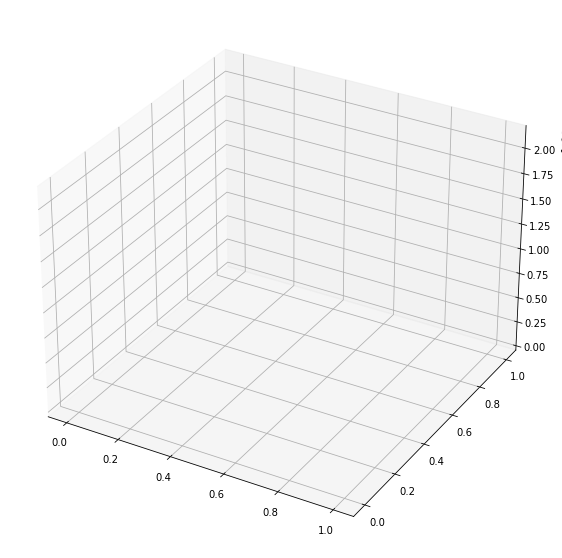

<Figure size 432x288 with 0 Axes>

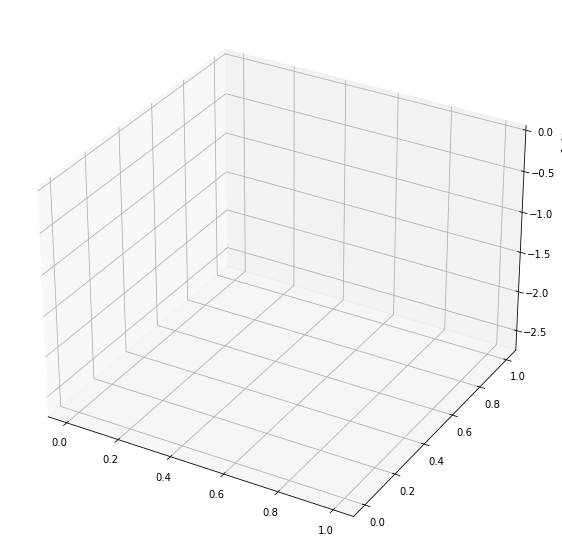

<Figure size 432x288 with 0 Axes>

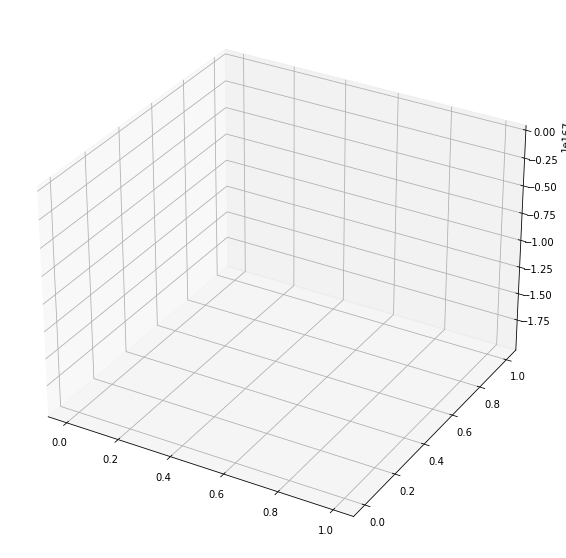

<Figure size 432x288 with 0 Axes>

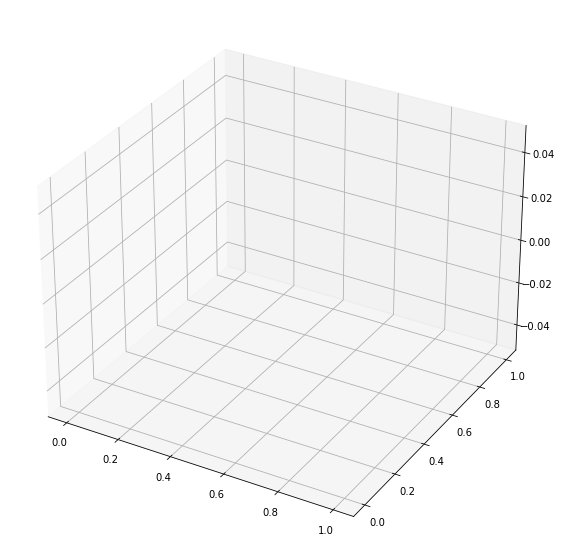

<Figure size 432x288 with 0 Axes>

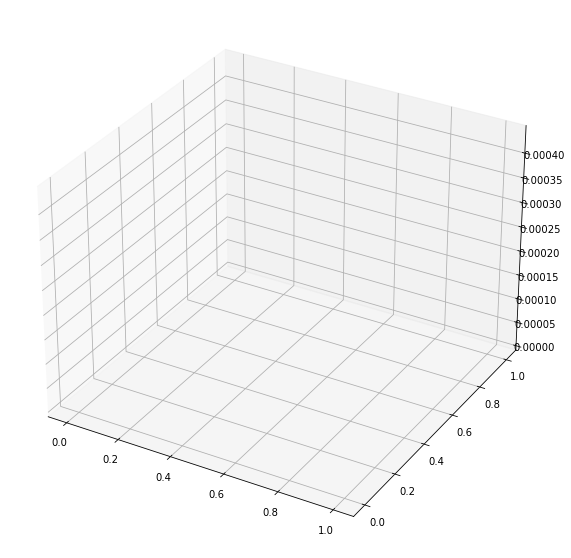

<Figure size 432x288 with 0 Axes>

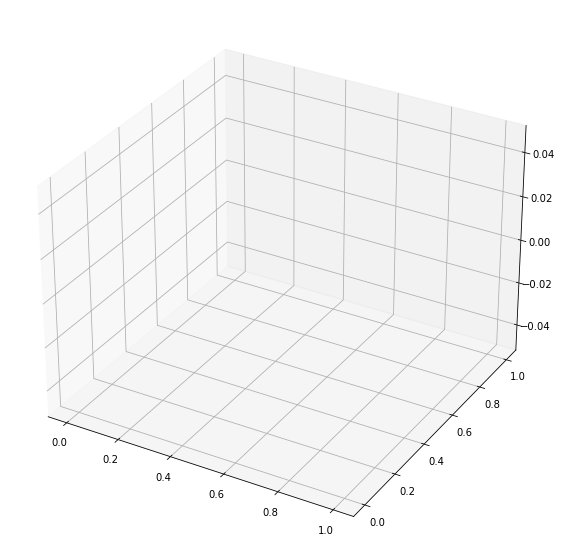

<Figure size 432x288 with 0 Axes>

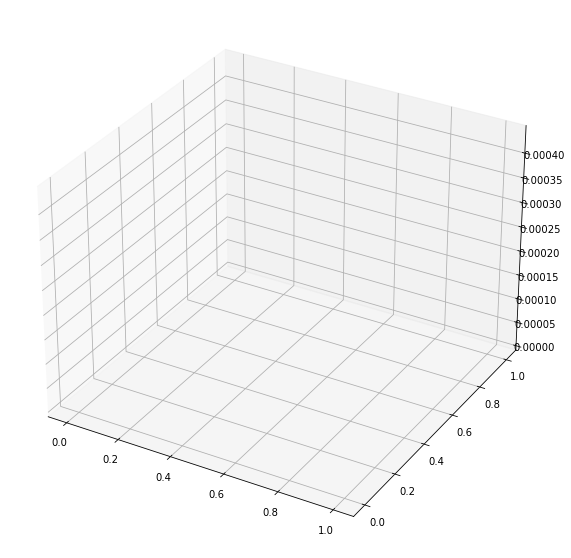

<Figure size 432x288 with 0 Axes>

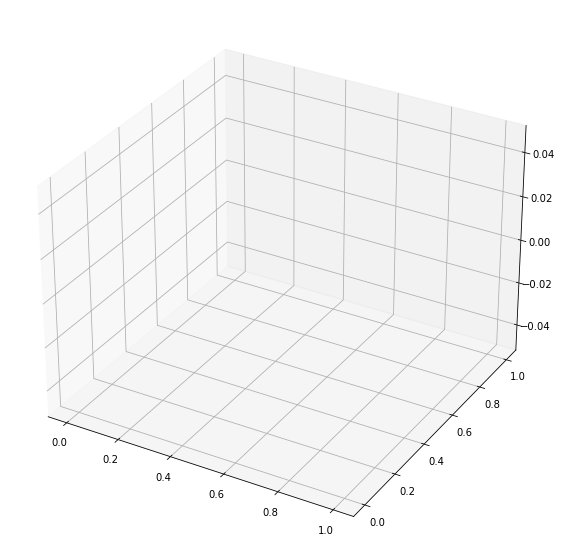

<Figure size 432x288 with 0 Axes>

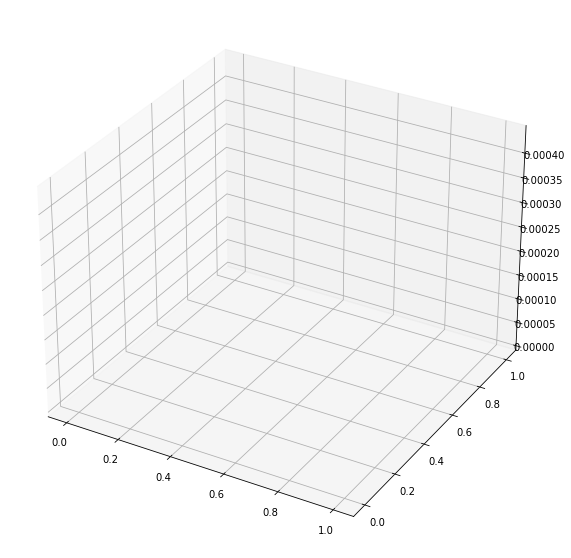

<Figure size 432x288 with 0 Axes>

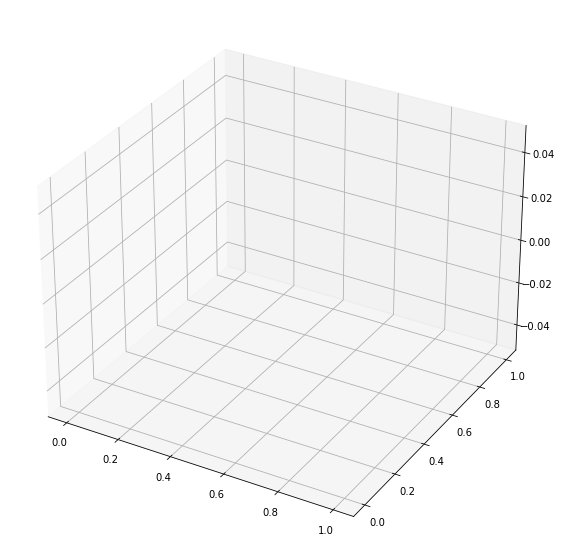

<Figure size 432x288 with 0 Axes>

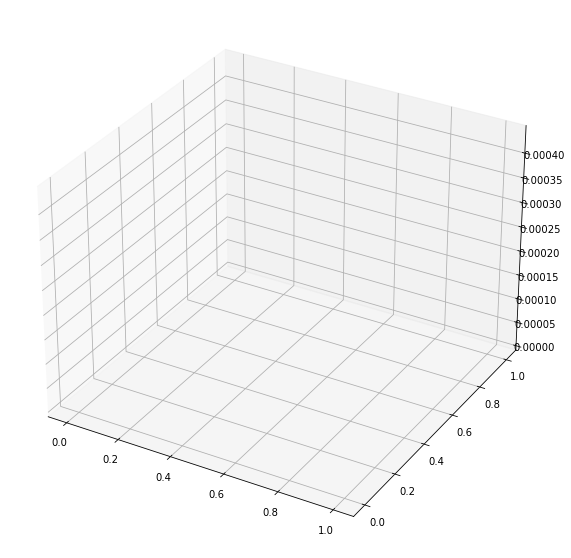

<Figure size 432x288 with 0 Axes>

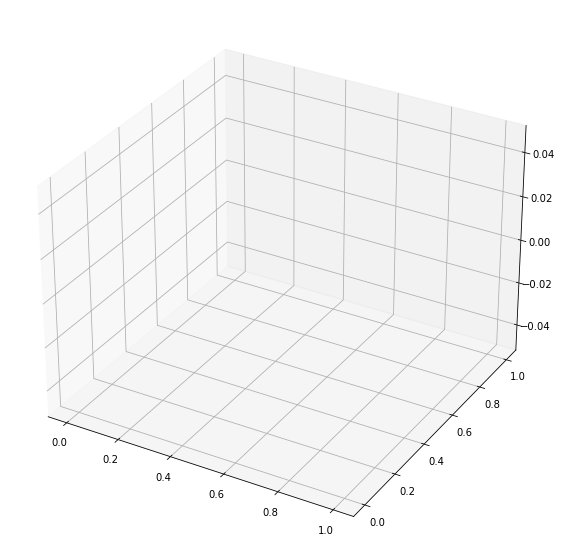

<Figure size 432x288 with 0 Axes>

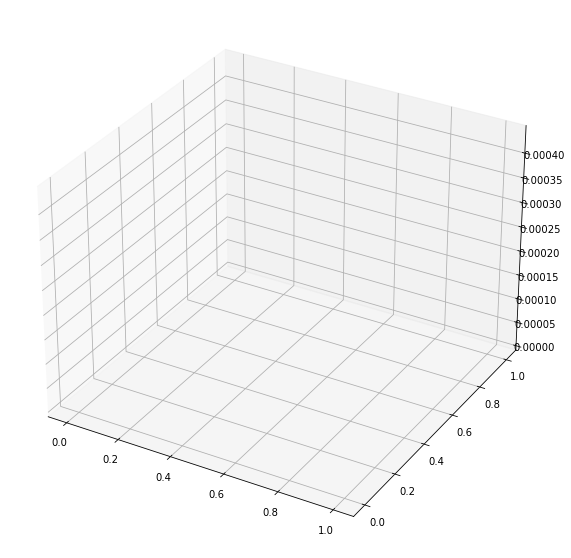

<Figure size 432x288 with 0 Axes>

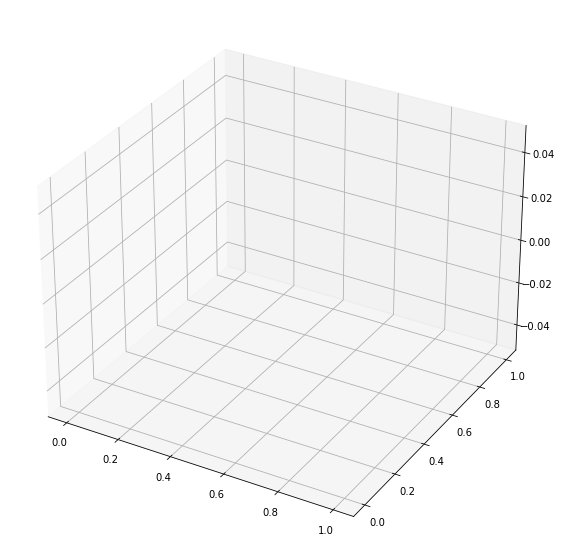

<Figure size 432x288 with 0 Axes>

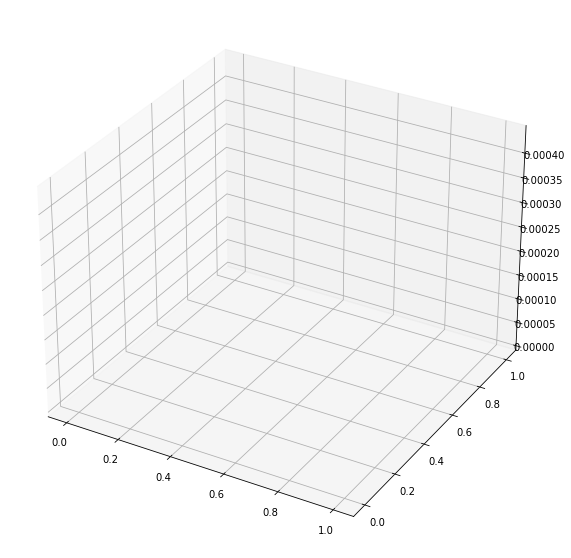

<Figure size 432x288 with 0 Axes>

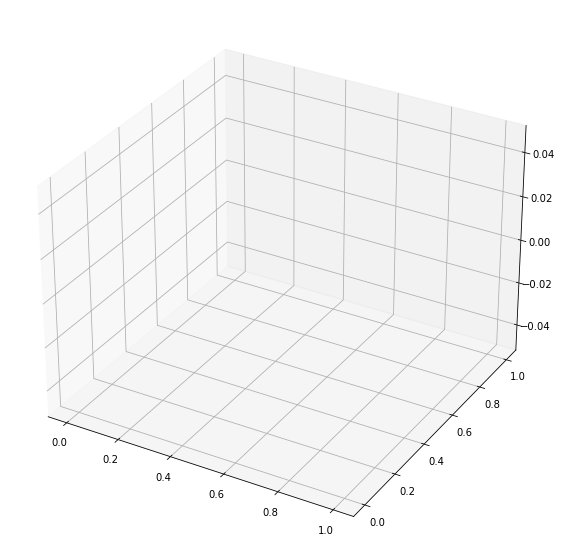

<Figure size 432x288 with 0 Axes>

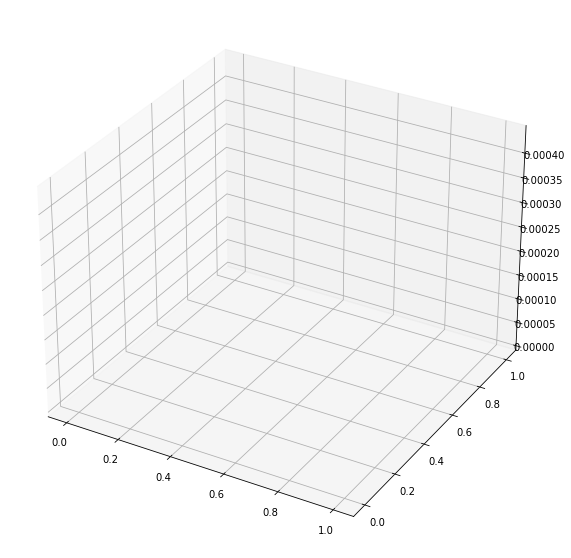

<Figure size 432x288 with 0 Axes>

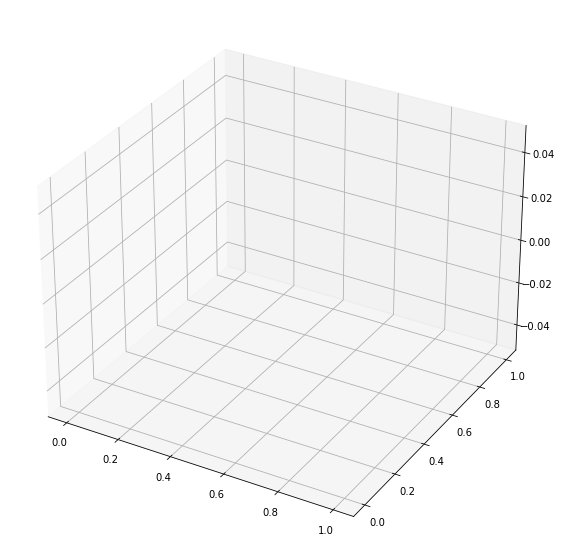

<Figure size 432x288 with 0 Axes>

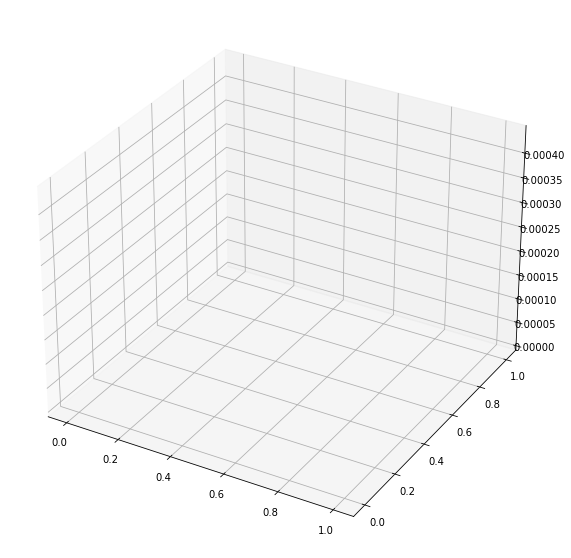

<Figure size 432x288 with 0 Axes>

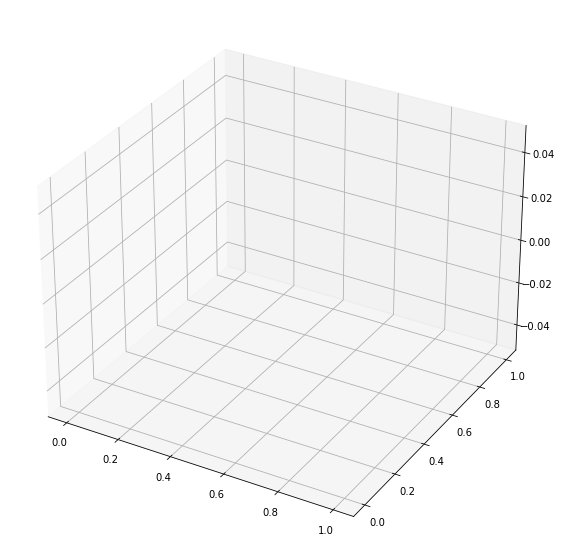

<Figure size 432x288 with 0 Axes>

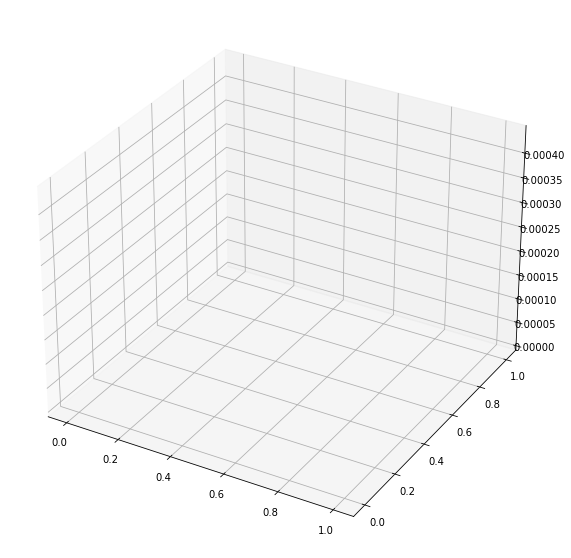

<Figure size 432x288 with 0 Axes>

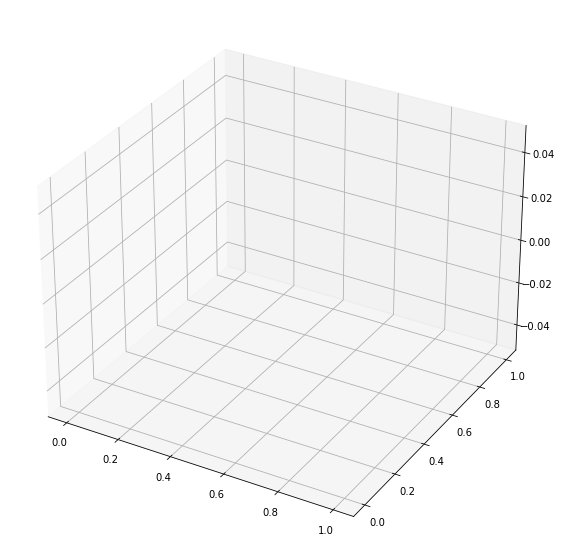

<Figure size 432x288 with 0 Axes>

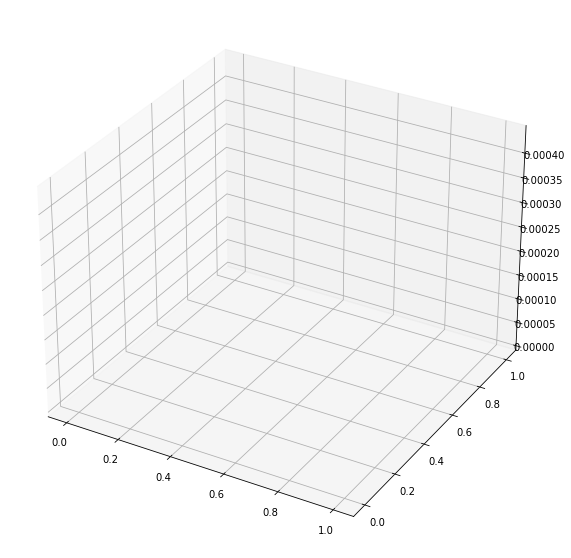

<Figure size 432x288 with 0 Axes>

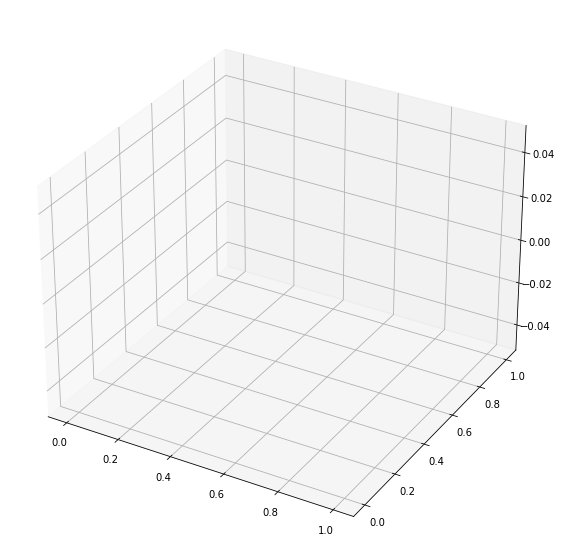

<Figure size 432x288 with 0 Axes>

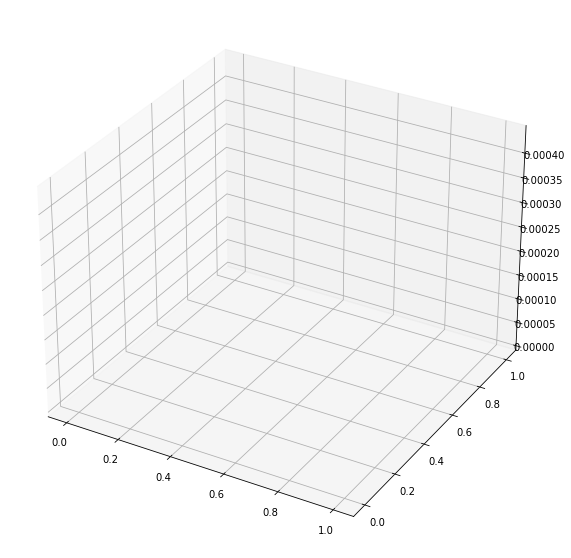

<Figure size 432x288 with 0 Axes>

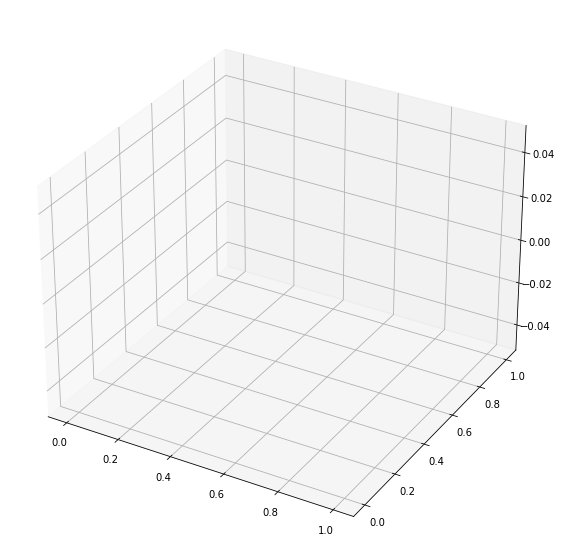

In [21]:
#####################################################################################################################
#####################################################################################################################
# Plotting 2D Burgers as Graph
#####################################################################################################################
###################################################################################################################
import numpy as np
import matplotlib.pyplot as plt
import csv

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d


# close all the figures, if open from previous commands
plt.close('all') 


for i in range(40):

    ########### Plot Data ###################
    a = []
    b = []
    c = []

    # open file for reading
    with open("2D_Burgers_time_step_"+str(i)+".csv") as csvDataFile:

        # read file as csv file 
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            a.append(row[0])
            b.append(row[1])
            c.append(row[2])


    a = np.delete(a, 0)
    b = np.delete(b, 0)
    c = np.delete(c, 0)

    d = [float(i) for i in a]
    e = [float(i) for i in b]        
    f = [float(i) for i in c]        

    d_2d = np.reshape(d, (10, 10))
    e_2d = np.reshape(e, (10, 10))
    f_2d = np.reshape(f, (10, 10))

    fig = plt.figure()
    plt.figure(figsize=(12,10))

    ax = plt.axes(projection='3d')

    ax.plot_surface(d_2d, e_2d, f_2d,cmap='viridis', edgecolor='none')
    #ax.set_zlim3d(-2,2)
    #ax.set_title('Surface plot')
    plt.savefig("2D_Burgers_Graph"+str(i)+".png")

    
    
    
#plt.show()
